# Chart: Risk Return Performance of Efficient Portfolios


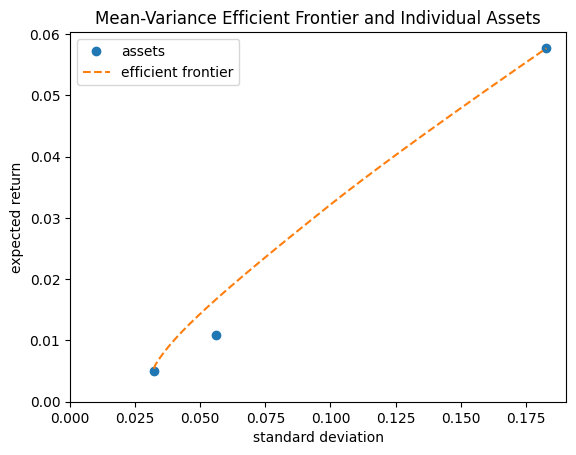

In [ ]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

historical_prices_url = "https://raw.githubusercontent.com/bu-cds-omds/dx704-examples/refs/heads/main/data/prices-monthly.tsv"
historical_prices = pd.read_csv(historical_prices_url, sep="\t")
historical_prices = historical_prices.set_index("date")

historical_returns = historical_prices.pct_change().dropna()
estimated_returns = historical_returns.mean().rename("return")
estimated_variances = historical_returns.var()

estimated_covariance = historical_returns.cov()

plt.plot(np.sqrt(estimated_variances), estimated_returns, label="assets", linestyle="none", marker="o")

# minimum risk portfolio

n = len(estimated_returns)

x_minimum_risk = cp.Variable(n)

objective_minimum_risk = cp.Minimize(x_minimum_risk.T @ estimated_covariance.to_numpy() @ x_minimum_risk)
objective_minimum_risk

prob_minimum_risk = cp.Problem(objective_minimum_risk,
                               [0 <= x_minimum_risk,
                                cp.sum(x_minimum_risk) == 1])

covariance_minimum_risk = prob_minimum_risk.solve()
covariance_minimum_risk

estimated_return_minimum_risk = x_minimum_risk.value.T @ estimated_returns
estimated_return_minimum_risk

# maximum return portfolio

estimated_return_maximum_return = max(estimated_returns)

# efficient frontier

ef_variances = []
ef_returns = []
ef_portfolios = []

for r in np.linspace(estimated_return_minimum_risk, estimated_return_maximum_return, 1001):
    # create variables to optimize
    x_r = cp.Variable(n)

    # formulate linear program
    prob_r = cp.Problem(cp.Minimize(x_r.T @ estimated_covariance.to_numpy() @ x_r),
                        [0 <= x_r,
                         cp.sum(x_r) == 1,
                         x_r.T @ estimated_returns == r])
    ef_variances.append(prob_r.solve())
    ef_returns.append(r)
    ef_portfolios.append(x_r.value)

plt.plot(np.sqrt(ef_variances), ef_returns, label="efficient frontier", linestyle="--")

plt.legend()
plt.xlabel("standard deviation")
plt.xlim(0)
plt.ylabel("expected return")
plt.ylim(0)
plt.title("Mean-Variance Efficient Frontier and Individual Assets")
plt.show();